In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import os
# os.chdir("/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentadienyl/")

In [3]:
data_folder = "./output/lowdin"
dmft_data_folder = "./output/lowdin/beta_1000/dmft_arxiv/eta_0.001/no_spin/nsites_5/adjust_mu_True"
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
dmft_sigma_file = f"{dmft_data_folder}/dmft_sigma.npy"

(7, 20000)
(20000,)


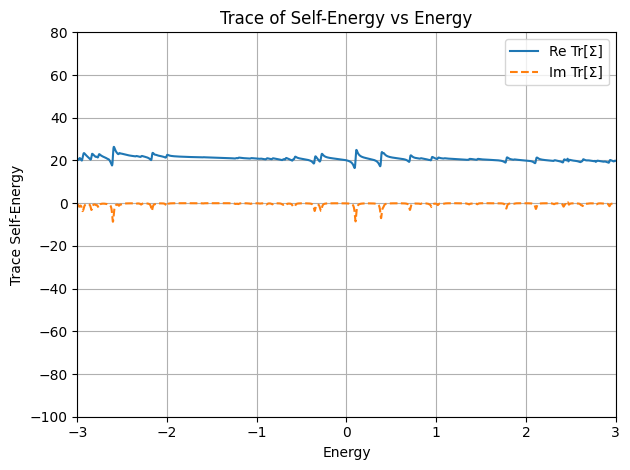

In [4]:
angelo_dmft_self_energy = np.load("Angelo_dmft/eta_1e-2/nbath7/self.npy")
angelo_energy = np.load("Angelo_dmft/eta_1e-2/nbath7/energies.npy")
print(angelo_dmft_self_energy.shape)
print(angelo_energy.shape)

trace_self_energy = np.sum(angelo_dmft_self_energy, axis=0)  # shape (20000,)

# Plot trace vs energy
plt.plot(angelo_energy, trace_self_energy.real, label='Re Tr[Σ]')
plt.plot(angelo_energy, trace_self_energy.imag, label='Im Tr[Σ]', linestyle='--')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy")
plt.xlim(-3, 3.0)
plt.ylim(-100,80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Filter to -3 to 3
mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_energies = angelo_energy[mask]
filtered_self_energy = angelo_dmft_self_energy[:, mask]

# # Subsample to ~600 points
# target_points = 600
# step = max(1, len(filtered_energies) // target_points)
# subsampled_energies = filtered_energies[::step]
# subsampled_self_energy = filtered_self_energy[:, ::step]  # shape (7, 600)

# Transpose to shape (600, 7) to work per energy point
subsampled_self_energy_T = filtered_self_energy.T  # shape (600, 7)

# Create diagonal matrices: shape (600, 7, 7)
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

print(self_energy_matrices.shape)  # should be (600, 7, 7)

mu = 2.79
self_energy_matrices[:, range(7), range(7)] -= mu

np.save("Angelo_dmft/subsampled_self_energy_mu_removed.npy", self_energy_matrices)
np.save("Angelo_dmft/subsampled_energies.npy", filtered_energies)

(12000, 7, 7)


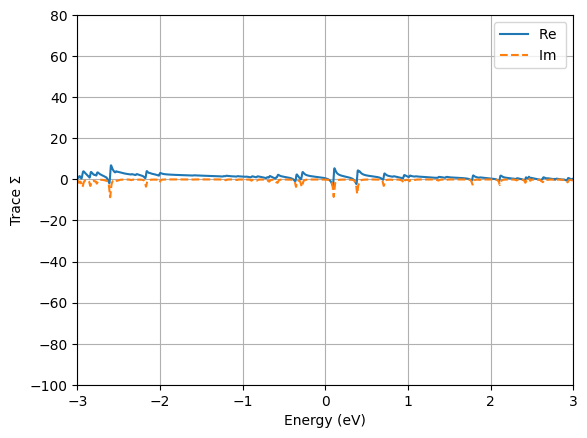

In [6]:
trace_self_energy = np.trace(self_energy_matrices , axis1=1, axis2=2)
plt.plot(filtered_energies, trace_self_energy.real,label='Re ')
plt.plot(filtered_energies, trace_self_energy.imag, '--', label='Im ')
plt.xlabel('Energy (eV)')
plt.ylabel('Trace Σ')
plt.xlim(-3,3)
plt.ylim(-100, 80)
plt.grid(True)
plt.legend()

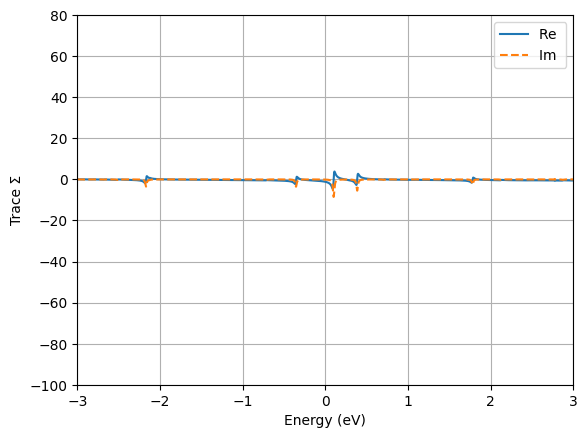

In [7]:
plt.plot(filtered_energies, self_energy_matrices[:,3,3].real,label='Re ')
plt.plot(filtered_energies, self_energy_matrices[:,3,3].imag, '--', label='Im ')
plt.xlabel('Energy (eV)')
plt.ylabel('Trace Σ')
plt.xlim(-3,3)
plt.ylim(-100, 80)
plt.grid(True)
plt.legend()

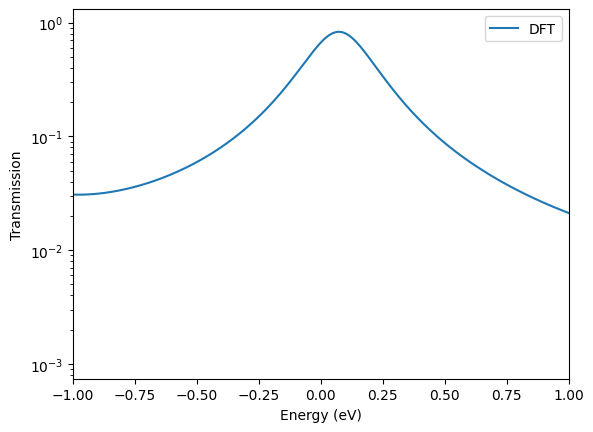

In [8]:
E,T = np.load("Angelo_dmft/eta_1e-3/nbath7/dmft_transmission_mu_removed.npy")
E_dft,T_dft = np.load("Angelo_dmft/eta_1e-3/nbath7/dft_transmission.npy")
E_unshifted,T_unshifted = np.load("Angelo_dmft/eta_1e-3/nbath7/dmft_transmission.npy")
plt.plot(E_dft, T_dft, label='DFT')
# plt.plot(E_unshifted, T_unshifted, label='DMFT')
# plt.plot(E, T, label='DMFT')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.xlim(-1,1)
plt.legend()


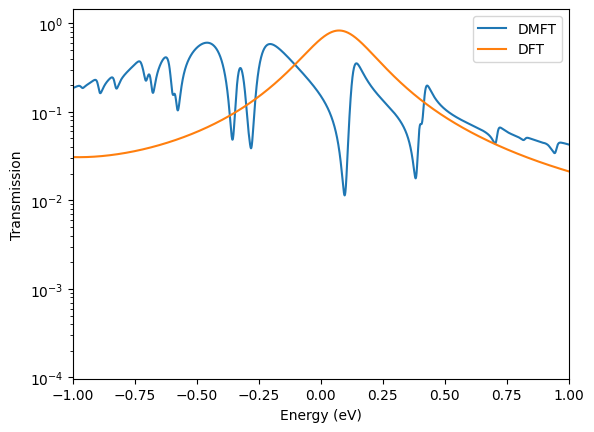

In [9]:
E,T = np.load("Angelo_dmft/eta_1e-2/nbath7/dmft_transmission_mu_3.0_removed.npy")
# plt.plot(E_unshifted, T_unshifted, label='DMFT')
plt.plot(E, T, label='DMFT')
plt.plot(E_dft, T_dft, label='DFT')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.xlim(-1,1)
plt.legend()


(0.0005, 1)

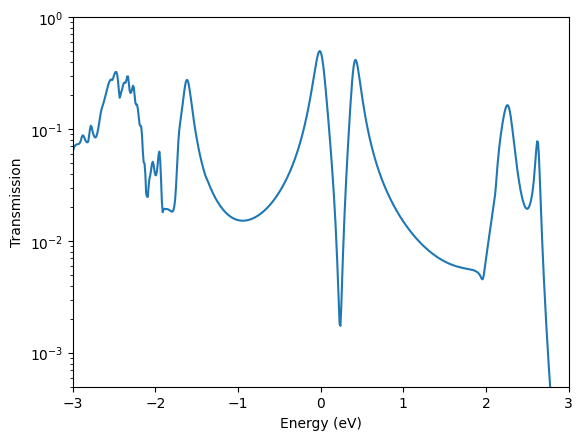

In [10]:
E_ref, T_ref = np.load("./reference/ET_dmft.npy")

plt.plot(E_ref, T_ref, label='DFT')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.xlim(-3,3)
plt.ylim(5e-4,1)
# plt.legend()

In [11]:
V_dft, I_dft = np.load("./output/lowdin/beta_1000/DFT_IV.npy")
V_dmft, I_dmft = np.load("./output/lowdin/beta_1000/DMFT_IV.npy")
V_dmft_ref, I_dmft_ref = np.load("./output/lowdin/beta_1000/Reference_DMFT_IV.npy")
plt.figure(figsize=(10, 5))
plt.plot(V_dft, I_dft, label='DFT ')
# plt.plot(I_dmft, V_dmft, label='DMFT ')
plt.plot(V_dmft_ref, I_dmft_ref, label='DMFT ')
plt.ylabel('Current')
plt.xlabel('Voltage (V)')
plt.legend()
plt.grid(True)

FileNotFoundError: [Errno 2] No such file or directory: './output/lowdin/beta_1000/DFT_IV.npy'

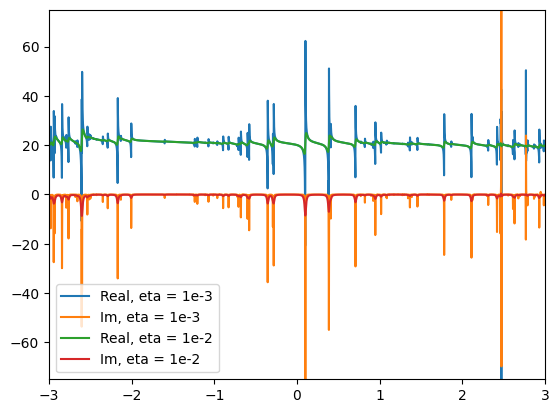

In [12]:
se_eta_small = np.load("Angelo_dmft/eta_1e-3/nbath7/self.npy")
se_eta_large = np.load("Angelo_dmft/eta_1e-2/nbath7/self.npy")
energy = np.load("Angelo_dmft/eta_1e-3/nbath7/energies.npy")
trace_se_small = np.sum(se_eta_small,axis=0)
trace_se_large = np.sum(se_eta_large,axis=0)
plt.plot(energy,trace_se_small.real,label="Real, eta = 1e-3")
plt.plot(energy,trace_se_small.imag,label="Im, eta = 1e-3")
plt.plot(energy,trace_se_large.real,label="Real, eta = 1e-2")
plt.plot(energy,trace_se_large.imag,label="Im, eta = 1e-2")
plt.xlim(-3,3)
plt.ylim(-75,75)
plt.legend()
plt.show()

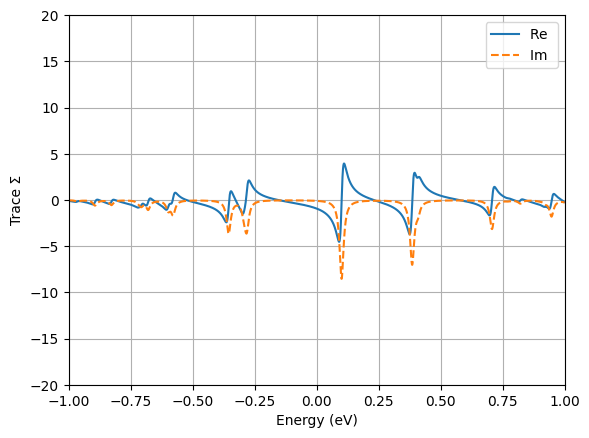

In [13]:
# Filter to -3 to 3
ref = np.loadtxt("reference/sigma_dmft_trace.txt")
mask = (energy >= -3) & (energy <= 3)
filtered_energies = energy[mask]
filtered_self_energy = se_eta_large[:, mask]

# # Subsample to ~600 points
# target_points = 600
# step = max(1, len(filtered_energies) // target_points)
# subsampled_energies = filtered_energies[::step]
# subsampled_self_energy = filtered_self_energy[:, ::step]  # shape (7, 600)

# Transpose to shape (600, 7) to work per energy point
subsampled_self_energy_T = filtered_self_energy.T  # shape (600, 7)

# Create diagonal matrices: shape (600, 7, 7)
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

mu = 3
self_energy_matrices[:, range(7), range(7)] -= mu

trace_self_energy = np.trace(self_energy_matrices , axis1=1, axis2=2)
plt.plot(filtered_energies, trace_self_energy.real,label='Re ')
plt.plot(filtered_energies, trace_self_energy.imag, '--', label='Im ')
# plt.plot(ref[:,0], ref[:,1], label="Re ref")
# plt.plot(ref[:,0], ref[:,2], label="Im ref")
plt.xlabel('Energy (eV)')
plt.ylabel('Trace Σ')
plt.xlim(-1,1)
plt.ylim(-20, 20)
plt.grid(True)
plt.legend()

np.save("Angelo_dmft/eta_1e-2/nbath7/subsampled_self_energy_mu_3.0_removed.npy", self_energy_matrices)
# np.save("Angelo_dmft/eta_1e-2/nbath7/subsampled_energies.npy", filtered_energies)

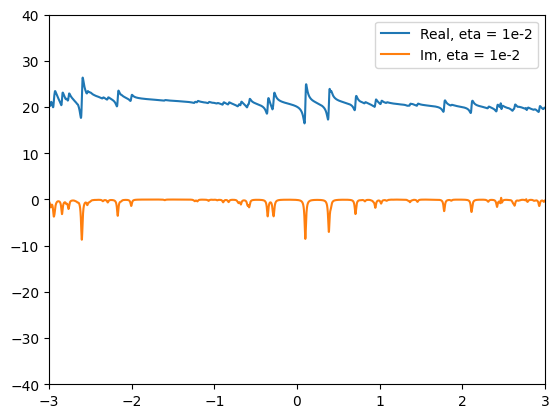

In [14]:
se_eta_large = np.load("Angelo_dmft/eta_1e-2/nbath7/self.npy")
energy = np.load("Angelo_dmft/eta_1e-3/nbath7/energies.npy")
trace_se_large = np.sum(se_eta_large,axis=0)
plt.plot(energy,trace_se_large.real,label="Real, eta = 1e-2")
plt.plot(energy,trace_se_large.imag,label="Im, eta = 1e-2")
plt.xlim(-3,3)
plt.ylim(-40,40)
plt.legend()
plt.show()

In [15]:
V = np.loadtxt("output/lowdin/U_matrix.txt")
data_folder = "./output/lowdin"
occupancy_goal = np.load(f"{data_folder}/occupancies.npy")
double_counting =(V.diagonal() * (occupancy_goal - 0.5))

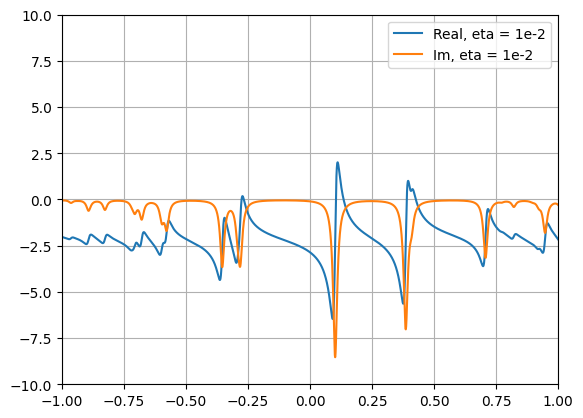

In [16]:
angelo_dmft_self_energy = np.load("Angelo_dmft/eta_1e-2/nbath7/self.npy")
angelo_energy = np.load("Angelo_dmft/eta_1e-2/nbath7/energies.npy")
angelo_dmft_self_energy = angelo_dmft_self_energy - double_counting[:, np.newaxis]
trace_se_large = np.sum(angelo_dmft_self_energy,axis=0)
plt.plot(angelo_energy,trace_se_large.real,label="Real, eta = 1e-2")
plt.plot(angelo_energy,trace_se_large.imag,label="Im, eta = 1e-2")
plt.xlim(-1,1)
plt.ylim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_energies = angelo_energy[mask]
filtered_self_energy = angelo_dmft_self_energy[:, mask]
subsampled_self_energy_T = filtered_self_energy.T
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

# np.save("Angelo_dmft/eta_1e-3/nbath7/subsampled_self_energy_with_dcc.npy", self_energy_matrices)

In [20]:
data_folder = "./output/lowdin"
self_energy = np.load(f"{data_folder}/self_energy.npy", allow_pickle=True)
de = 0.1
energies = np.arange(-1, 1 + de / 2.0, de).round(7)
se = np.array([self_energy[0].retarded(e) for e in energies])

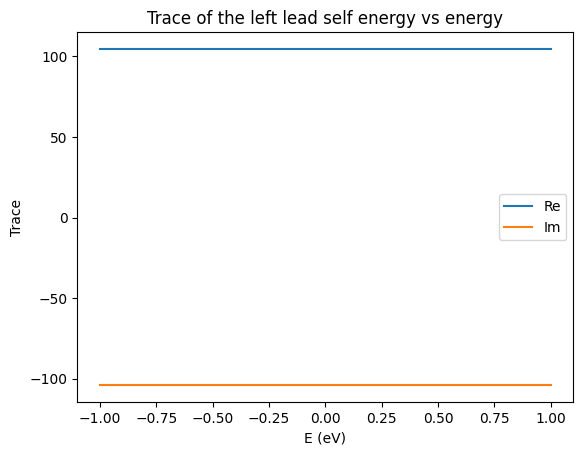

In [25]:
se_trace = np.trace(se, axis1=1, axis2=2)
plt.plot(energies,se_trace.real,label="Re")
plt.plot(energies,se_trace.imag,label="Im")
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Trace")
plt.title("Trace of the left lead self energy vs energy")
plt.show()

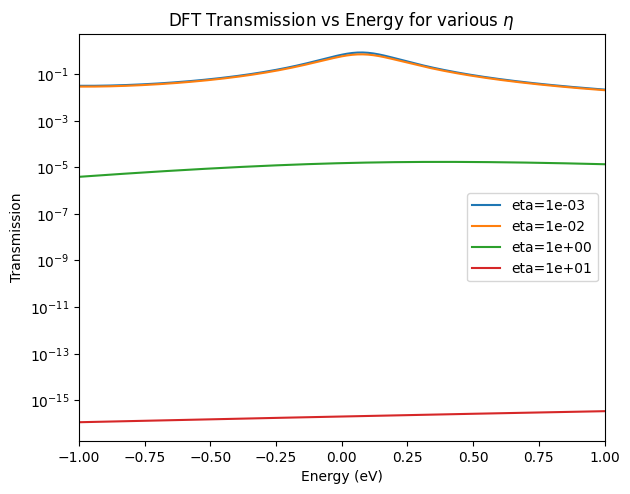

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_folder = Path("./output/lowdin")
etas = [1e-3, 1e-2, 1, 10]

plt.figure()

for eta in etas:
    file = data_folder / f"dft_transmission_eta{eta:.0e}.npy"
    energies, T = np.load(file, allow_pickle=True)
    plt.plot(energies, T, label=f"eta={eta:.0e}")

plt.yscale("log")
plt.xlim(-1., 1.)
# plt.ylim(1e-8, 1)
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.legend()
plt.tight_layout()
plt.title("DFT Transmission vs Energy for various $\eta$")
plt.show()
